importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/raw/heart_disease_encoded.csv")
df

Exploratory data analysis

In [ ]:
# data inspection ->

print(df.shape)
print(df.dtypes)
print(df.isna().sum())

In [ ]:
# UNIVARIATE ANALYSIS ->
# distribution of various features used in the model ->
# countplots for categorical features and histplots for continous features ->

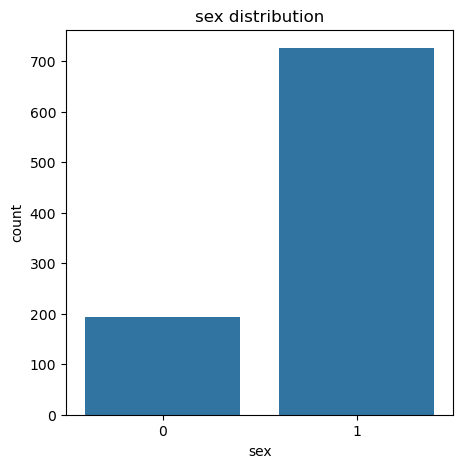

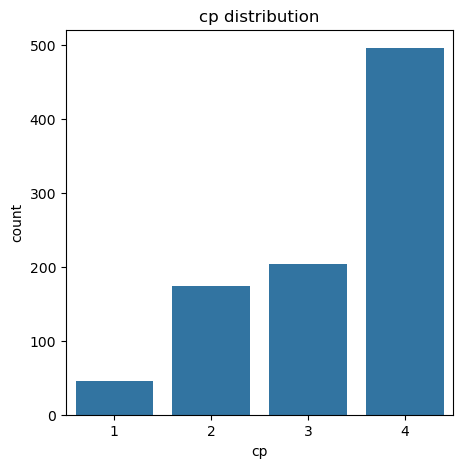

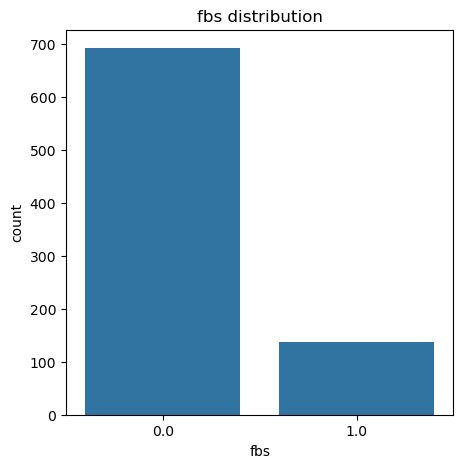

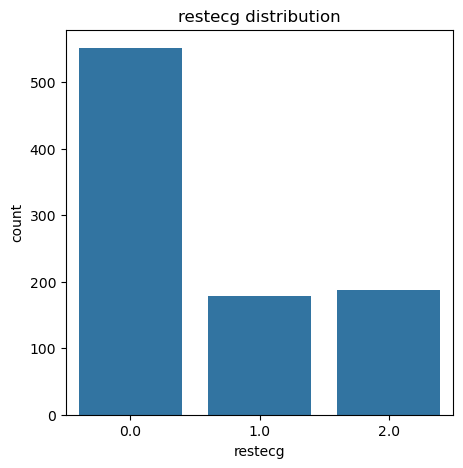

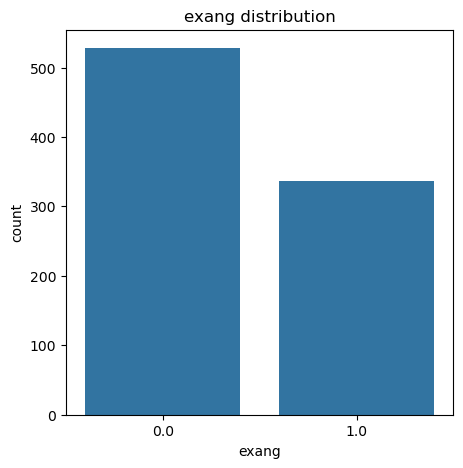

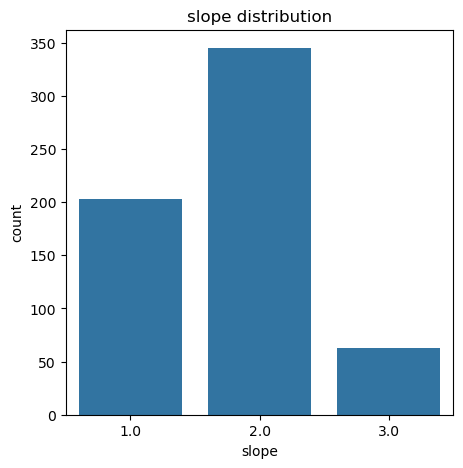

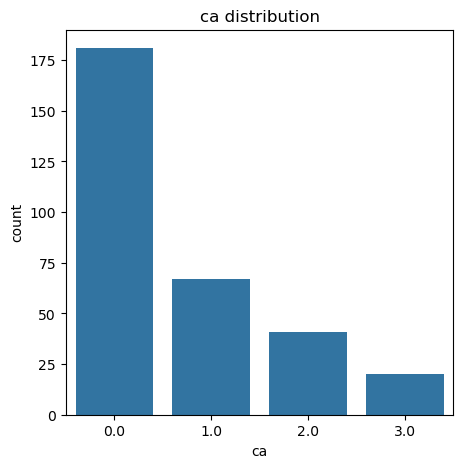

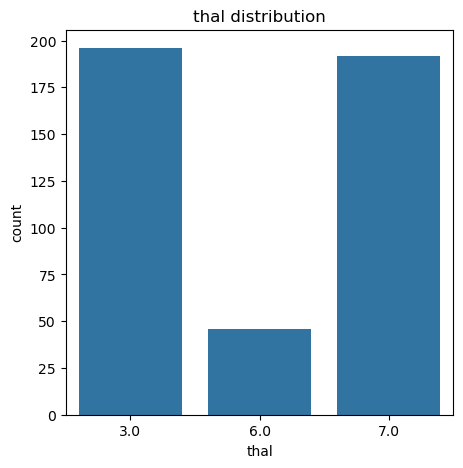

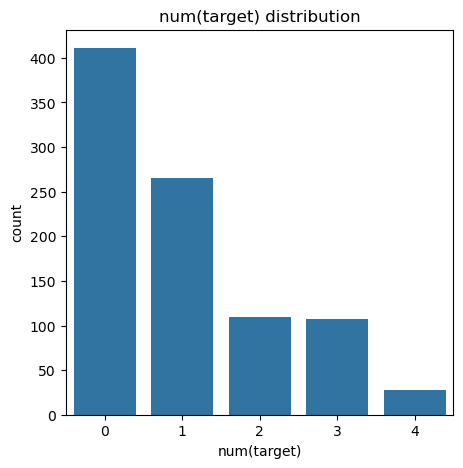

In [3]:
# ploting categorical features ->

# function to make countplots for categorical features
def plot_categorical_feature(feature,df):
    plt.figure(figsize=(5,5))
    ax = sns.countplot(x=feature,data=df)
    plt.title(f'{feature} distribution')
    plt.show()

# categorical features -> sex, cp, fbs, restecg, exang, slope, ca, thal, target
cat_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal','num(target)']
for f in cat_features:
    plot_categorical_feature(f,df)

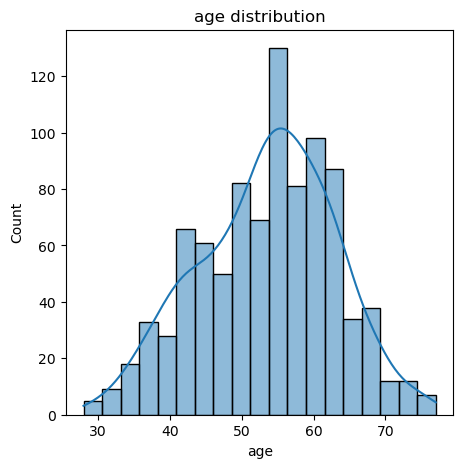

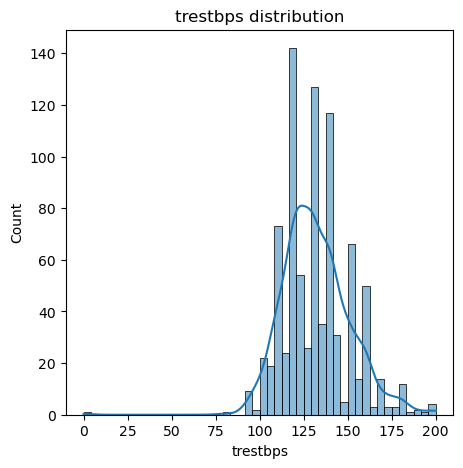

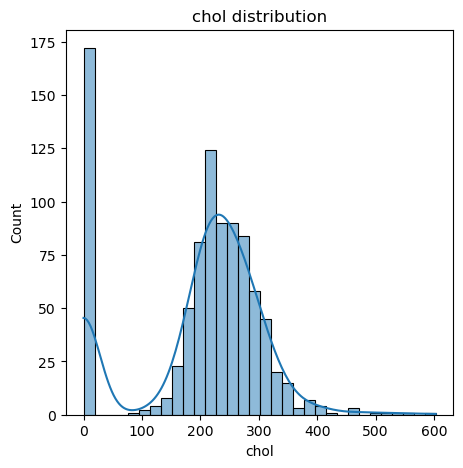

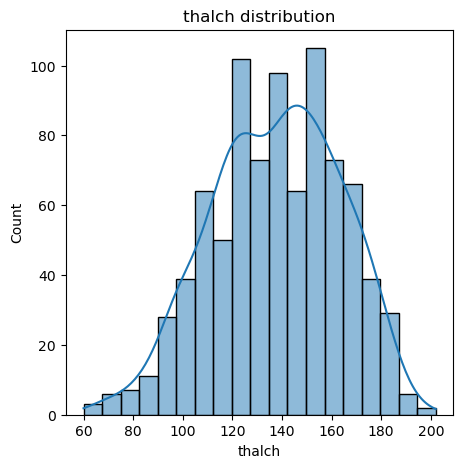

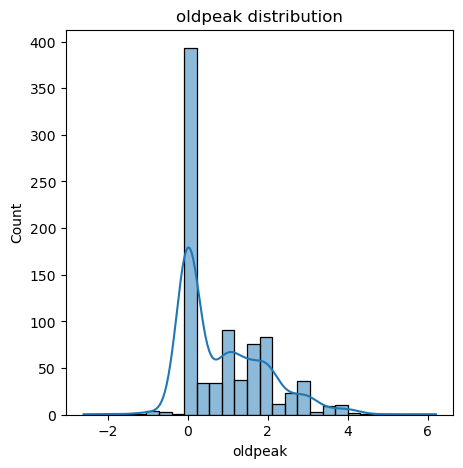

In [4]:
# plotting continuous features ->

# function to make histplots for continuous features ->
def plot_continuous_feature(feature,df):
    plt.figure(figsize=(5,5))
    ax = sns.histplot(df[feature],kde=True)
    plt.title(f'{feature} distribution')
    plt.show()

# continuous features -> age, trestbps, chol, thalch, oldpeak
cont_features = ['age','trestbps','chol','thalch','oldpeak']
for f in cont_features:
    plot_continuous_feature(f,df)